In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, LabelEncoder

post_vacc_inf = pd.read_csv("../data/Post-Vaccination_Infection_Data.csv")

vacc_prog = pd.read_csv("../data/Vaccine_Progress_Dashboard_Data.csv")

## Vaccination_Progress_Data study

In [2]:
# This table shows stats of vaccination progress for counties in california state.
vacc_prog

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag,booster_recip_count,cumulative_booster_recip_count
0,Alameda,2020-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0
1,Alameda,2020-07-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0
2,Alameda,2020-07-29,0,1,0,0,0,1,0,0,0,1,0,0,0,1,NaN,0,0
3,Alameda,2020-07-30,0,1,0,0,0,1,0,0,0,1,0,0,0,1,NaN,0,0
4,Alameda,2020-07-31,0,1,0,0,0,1,0,0,0,1,0,0,0,1,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40233,Yuba,2022-05-01,16,95111,12,38650,4,49016,0,4770,3,3683,4,38741,3,42424,California,3,16449
40234,Yuba,2022-05-02,44,95155,18,38668,25,49041,1,4771,6,3686,4,38745,7,42431,California,5,16454
40235,Yuba,2022-05-03,52,95207,21,38689,28,49069,2,4773,2,3682,8,38753,4,42435,California,11,16465
40236,Yuba,2022-05-04,51,95258,18,38707,31,49100,0,4773,10,3690,2,38755,10,42445,California,13,16478


In [3]:
# It is a daily data from 2021-01-05 to 2022-03-06
# March 2022 data also available online
vacc_prog['administered_date'].value_counts()

2020-01-05    62
2021-10-15    62
2021-09-27    62
2021-09-28    62
2021-09-29    62
              ..
2021-03-01    62
2021-03-02    62
2021-03-03    62
2021-03-04    62
2022-05-05    62
Name: administered_date, Length: 649, dtype: int64

In [4]:
# Found 'All CA Counties' and 'All CA and Non-CA Counties' in the dataset, 
# which will make daily number 3 times larger if we sum it by group
vacc_prog.county.unique()


array(['Alameda', 'All CA Counties', 'All CA and Non-CA Counties',
       'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa', 'Contra Costa',
       'Del Norte', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt',
       'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Outside California', 'Placer', 'Plumas', 'Riverside',
       'Sacramento', 'San Benito', 'San Bernardino', 'San Diego',
       'San Francisco', 'San Joaquin', 'San Luis Obispo', 'San Mateo',
       'Santa Barbara', 'Santa Clara', 'Santa Cruz', 'Shasta', 'Sierra',
       'Siskiyou', 'Solano', 'Sonoma', 'Stanislaus', 'Sutter', 'Tehama',
       'Trinity', 'Tulare', 'Tuolumne', 'Unknown', 'Ventura', 'Yolo',
       'Yuba'], dtype=object)

In [5]:
# Check for missing data
for column in vacc_prog.columns:
    count = vacc_prog[column].isnull().sum()
    if count > 0:
      print(f'{column} has {count} missing data')
    
# Only California flag column has missing data, can drop the column

california_flag has 8938 missing data


In [6]:
# Data type on the table looks already cleaned
vacc_prog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40238 entries, 0 to 40237
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   county                          40238 non-null  object
 1   administered_date               40238 non-null  object
 2   total_doses                     40238 non-null  int64 
 3   cumulative_total_doses          40238 non-null  int64 
 4   pfizer_doses                    40238 non-null  int64 
 5   cumulative_pfizer_doses         40238 non-null  int64 
 6   moderna_doses                   40238 non-null  int64 
 7   cumulative_moderna_doses        40238 non-null  int64 
 8   jj_doses                        40238 non-null  int64 
 9   cumulative_jj_doses             40238 non-null  int64 
 10  partially_vaccinated            40238 non-null  int64 
 11  total_partially_vaccinated      40238 non-null  int64 
 12  fully_vaccinated                40238 non-null

cumulative data does not privode much information, therefore can drop them.

In [7]:
# Extract only "All CA Counties"
vacc_prog_by_date = vacc_prog[vacc_prog['county'] == 'All CA Counties']
vacc_prog_by_date.set_index('administered_date', inplace=True)


[Text(0, 0, '2020-01-05'),
 Text(50, 0, '2020-09-14'),
 Text(100, 0, '2020-11-03'),
 Text(150, 0, '2020-12-23'),
 Text(200, 0, '2021-02-11'),
 Text(250, 0, '2021-04-02'),
 Text(300, 0, '2021-05-22'),
 Text(350, 0, '2021-07-11'),
 Text(400, 0, '2021-08-30'),
 Text(450, 0, '2021-10-19'),
 Text(500, 0, '2021-12-08'),
 Text(550, 0, '2022-01-27'),
 Text(600, 0, '2022-03-18')]

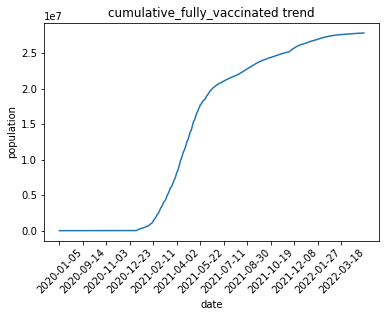

In [8]:
ax = vacc_prog_by_date['cumulative_fully_vaccinated'].plot()
ax.set_title("cumulative_fully_vaccinated trend")
ax.set_xlabel('date')
ax.set_ylabel('population')
xtick = [i for i in range(0, len(vacc_prog_by_date.index), 50)]
xtick_label = [ vacc_prog_by_date.index[i] for i in xtick]
ax.set_xticks(xtick)
ax.set_xticklabels(xtick_label, rotation=45)

In [9]:
vacc_prog_by_date['moderna_doses'].sum()

27425250

In [10]:
vacc_prog_by_date['cumulative_moderna_doses'].tail(1)

administered_date
2022-05-05    27425250
Name: cumulative_moderna_doses, dtype: int64

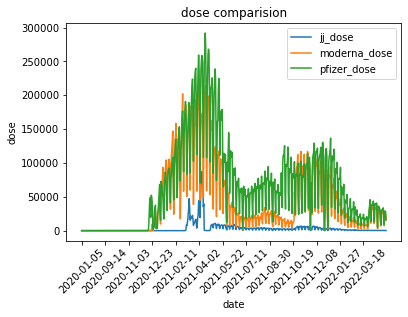

In [11]:
plt.plot(vacc_prog_by_date.index, vacc_prog_by_date['jj_doses'], label='jj_dose')
plt.plot(vacc_prog_by_date.index, vacc_prog_by_date['moderna_doses'], label='moderna_dose')
plt.plot(vacc_prog_by_date.index, vacc_prog_by_date['pfizer_doses'], label='pfizer_dose')
plt.title('dose comparision')
plt.xticks(xtick, xtick_label, rotation=45)
plt.xlabel('date')
plt.ylabel('dose')
plt.legend()
plt.show()